# Apresentação:

Esse trecho do curso trata sobre função de ativação e sua importância na construção de uma rede neural. De fato a função de ativação é um dos elementos fundamentais no funcionamento de uma rede neural, talvez o coração da ideia, de modo que faz-se muito importante estudar sobre.



In [8]:
# Bibliotecas importadas:
import numpy as np
import torch.nn as nn
import torch

# Funções de Ativação:

Vamos começar pela [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) e a [softmax](https://en.wikipedia.org/wiki/Softmax_function), ambas funções de ativação utilizadas em problemas de **classificação** e muito importantes na construção da técnica de redes neurais.

**Sigmoid**

$$\sigma(x) = \frac{1}{1+e^{-x}} = \frac{e^{-x}}{1+e^{-x}}$$

**Softmax**
$$\sigma(\textbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^Ke^{z_j}}$$

Os outputs da **sigmoide** são limitados entre $\small zero$ e $\small 1$, o que significa que $\small \forall x_j, \ j=1,2,3,...$, $\small 0\lt \hat{y}\lt 1$. Diferentemente da função **softmax**, a **sigmoid** pode ser usada em qualquer lugar da rede. Quando plotamos as derivadas (ou gradientes) da função **sigmoide em laranja**, percebemos que os gradientes são sempre baixos e se aproximam de $\small zero$ para valores baixos e altos de $\small x$.

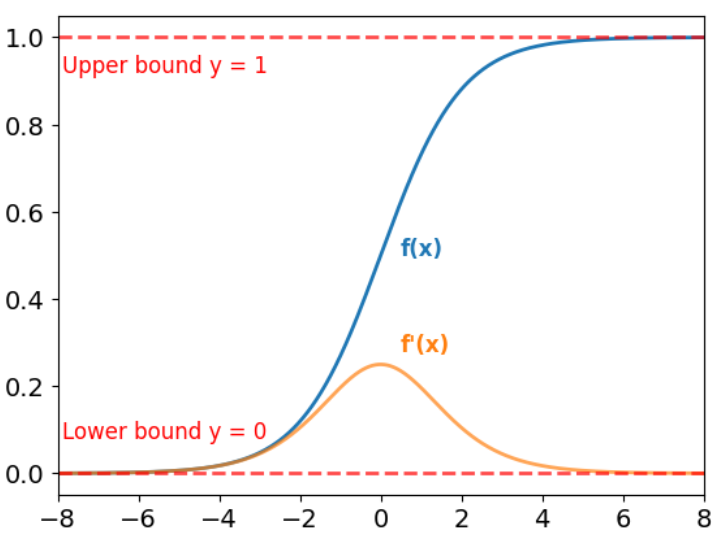


Esse comportamento é chamado de **saturação**. Essa propriedade da função **sigmoide** cria um desafio durante a **retropropagação**, pois cada gradiente local é uma função do gradiente anterior. Para valores altos e baixos de $\small x$, o gradiente será tão pequeno que pode impedir que o peso mude ou seja atualizado. Esse fenômeno é chamado de *vanishing gradients* (gradientes que desaparecem) e torna o treinamento da rede desafiador. Como cada elemento do vetor de saída de uma função de ativação **softmax** também é limitado entre $\small zero$ e $\small 1$, o **softmax também sofre saturação**. Tais funções de ativação são importandos utilizando da classe principal `torch`.

In [ ]:
# Função de ativação Sigmoid:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada da Sigmoid:
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# implementação da sigmoid pelo PyTorch:
def sigmoid_torch(x):
    return torch.sigmoid(x)

In [ ]:
# Função de ativação Softmax:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# Derivada da Softmax:
def softmax_prime(x):
    return softmax(x) * (1 - softmax(x))

In [ ]:
# Implementação da Softmax pelo PyTorch:
def softmax_torch(x):
    return torch.nn.functional.softmax(x, dim=0)

**ReLU (rectified linear unit)**

A função [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) retorna o máximo entre sua entrada e $\small zero$, ou seja, $\small f(x)=\max(0,x)$ conforme mostrado no gráfico.

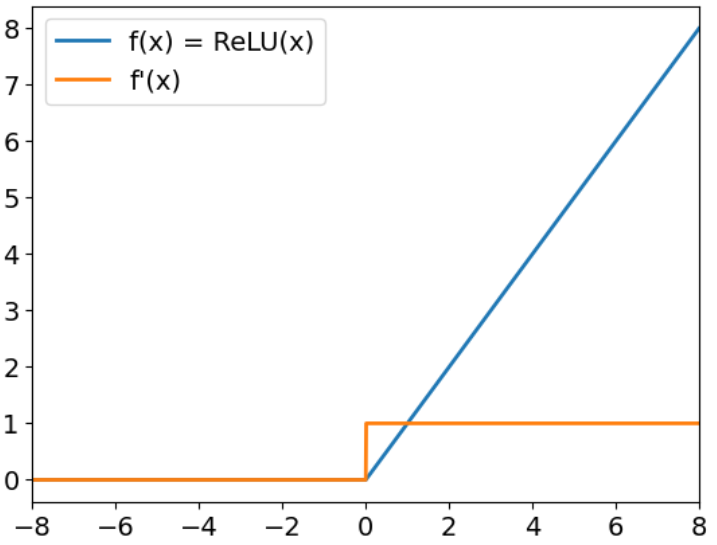


 Para entradas positivas, o output da função é igual à entrada. Para entradas estritamente negativas, o output da função é igual a $\small zero$. Note que matemáticamente falando, a **ReLU** nada mais é que uma **função indicadora**. Esta função **não tem um limite superior** e os **gradientes não convergem para zero** para valores altos de $x$, o que supera o problema dos gradientes que desaparecem (*vanishing gradients*).

 No PyTorch, diferente das outras funções de ativação, a função **ReLU** pode ser chamada usando o módulo `nn`, conforme mostrado. **ReLU** é uma boa escolha padrão de ativação para muitos problemas de *deep learning*.

In [3]:
# Função de ativação ReLU:
def relu(x):
    return np.maximum(0, x)

# Derivada da ReLU:
def relu_deriv(x):
    return 1 * (x > 0) # Aqui é uma jogada esperta

In [ ]:
# Implementação da ReLU pelo PyTorch:
relu_torch = nn.ReLU()

**leaky ReLU**

O [leaky ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) é uma **variação da função ReLU**. Para entradas positivas, ele se comporta de maneira semelhante à função **ReLU**. No entanto, **para entradas negativas**, **ele as multiplica por um pequeno coeficiente** (por padrão, 0.01 no PyTorch).

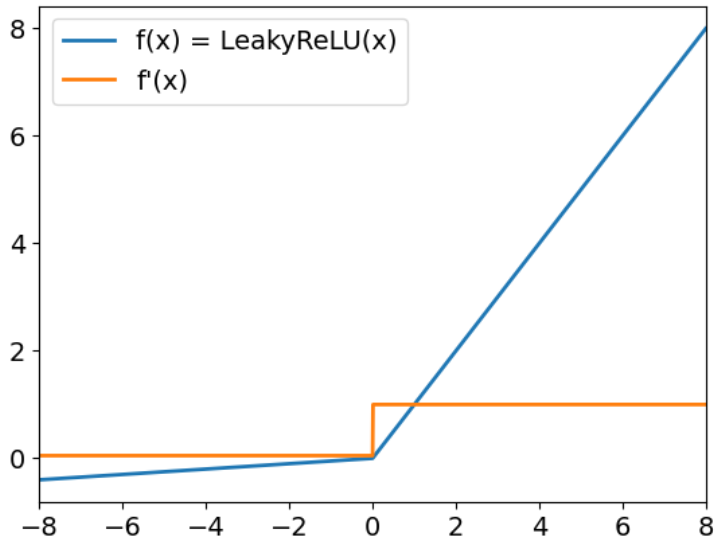

Ao fazer isso, a função **leaky ReLU** possui gradientes **não nulos para entradas negativas**. No PyTorch, a função **leaky ReLU** é chamada usando o módulo `nn` também. O parâmetro negative_slope indica o coeficiente pelo qual as entradas negativas são multiplicadas.

In [ ]:
# Função de ativação leaky ReLU:
def leaky_relu(x, negative_slope=0.01):
    return max(negative_slope * x, x)


# Derivada da leaky ReLU:
def leaky_relu_derivative(x, negative_slope=0.01):
    if x > 0:
        return 1
    else:
        return negative_slope

In [ ]:
# Implementação da leaky ReLU pelo PyTorch:
leaky_relu_torch = nn.LeakyReLU(negative_slope=0.05)